In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
#This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
#For more dataset information, please go through the following link,
#http://ai.stanford.edu/~amaas/data/sentiment/

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python_google_colab/IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

corpus_lm = []
wl = WordNetLemmatizer()
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['review'][i])
    review = review.lower()
    review = review.split()
    review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_lm.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [9]:
corpus_lm[0]

'one reviewer mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experi

In [10]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [11]:

size_voc = 5000

onehot_repr=[one_hot(words,size_voc)for words in corpus_lm] 
onehot_repr[0]

[99,
 1624,
 3029,
 67,
 4775,
 2676,
 2446,
 934,
 2463,
 4613,
 395,
 395,
 916,
 241,
 472,
 4775,
 4748,
 86,
 3742,
 4238,
 250,
 934,
 4235,
 3619,
 2550,
 1737,
 358,
 2013,
 1445,
 1737,
 3615,
 1180,
 2799,
 4699,
 3515,
 4238,
 3711,
 3574,
 3067,
 4235,
 395,
 395,
 4121,
 4775,
 1483,
 2070,
 608,
 2649,
 1342,
 584,
 3382,
 3786,
 158,
 4211,
 3674,
 554,
 4484,
 3528,
 2164,
 114,
 3042,
 4864,
 1290,
 3638,
 4258,
 3014,
 1524,
 3674,
 3617,
 4682,
 4686,
 2995,
 1789,
 1739,
 3989,
 1162,
 1938,
 1737,
 361,
 4991,
 2053,
 4871,
 573,
 955,
 4121,
 4479,
 3388,
 395,
 395,
 1063,
 4702,
 1889,
 3153,
 1737,
 1067,
 462,
 3619,
 1737,
 608,
 1467,
 4676,
 3030,
 1928,
 2782,
 4280,
 1467,
 1892,
 1467,
 1108,
 4775,
 1754,
 3128,
 916,
 2676,
 2171,
 4227,
 472,
 3175,
 304,
 4702,
 2894,
 3861,
 1019,
 473,
 4775,
 2148,
 1684,
 4258,
 18,
 2972,
 4238,
 4238,
 4831,
 783,
 1751,
 748,
 4673,
 1712,
 3121,
 4701,
 1356,
 3388,
 4820,
 2751,
 778,
 1979,
 1712,
 3061,
 3

In [16]:
df_new = pd.concat([df['review'],df['sentiment']],axis=1)
df_new.replace({'sentiment' : { 'negative' :0,  'positive' : 1}} ,inplace=True )

In [17]:
df_new.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [21]:
sent_length=70
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 608 1467 4676 ... 2582 4169 1377]
 [ 332 3191 4820 ... 1583 4820 1008]
 [3617 1908 4513 ... 3619 1086 3823]
 ...
 [4820 4199 2800 ... 2687  527 4999]
 [ 739 3242 4008 ... 4053  942  902]
 [   0    0   99 ... 3928 4180 1993]]


In [31]:
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM,Bidirectional
## Creating model
embedding_vector_features=200
model=Sequential()
model.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 70, 200)           1000000   
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 200)               240800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,241,001
Trainable params: 1,241,001
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
import numpy as np
X_final_lstm = np.array(embedded_docs)
print(X_final_lstm.shape)

(50000, 70)


In [33]:
y = df_new['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final_lstm, y, test_size=0.2, random_state=42)

In [34]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=100)

Epoch 1/10
400/400 [==============================] - 13s 27ms/step - loss: 0.4155 - accuracy: 0.8063 - val_loss: 0.3454 - val_accuracy: 0.8446
Epoch 2/10
400/400 [==============================] - 10s 25ms/step - loss: 0.3185 - accuracy: 0.8636 - val_loss: 0.3612 - val_accuracy: 0.8374
Epoch 3/10
400/400 [==============================] - 10s 24ms/step - loss: 0.2678 - accuracy: 0.8871 - val_loss: 0.3840 - val_accuracy: 0.8377
Epoch 4/10
400/400 [==============================] - 10s 24ms/step - loss: 0.2210 - accuracy: 0.9096 - val_loss: 0.4040 - val_accuracy: 0.8284
Epoch 5/10
400/400 [==============================] - 10s 24ms/step - loss: 0.1712 - accuracy: 0.9330 - val_loss: 0.4850 - val_accuracy: 0.8205
Epoch 6/10
400/400 [==============================] - 10s 24ms/step - loss: 0.1262 - accuracy: 0.9531 - val_loss: 0.6692 - val_accuracy: 0.8083
Epoch 7/10
400/400 [==============================] - 10s 24ms/step - loss: 0.0923 - accuracy: 0.9663 - val_loss: 0.7545 - val_accuracy:

In [35]:
################### test data prediction #####################################
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print("confusion-matrix:\n" ,confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion-matrix:
 [[4028  933]
 [ 999 4040]]
accuracy_score: 0.8068


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


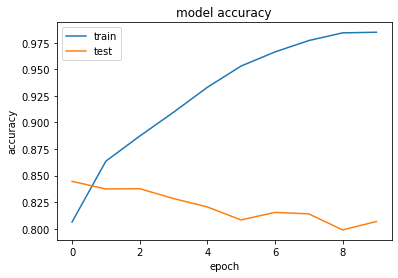

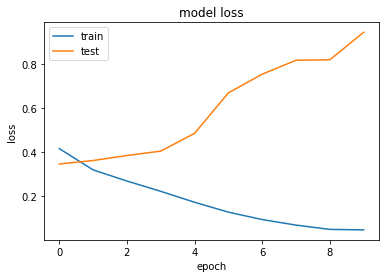

In [36]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 70, 140)           700000    
_________________________________________________________________
module_wrapper_38 (ModuleWra (None, 70, 100)           96400     
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 100)               80400     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 876,901
Trainable params: 876,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
500/500 [==============================] - 13s 21ms/step - loss: 0.4563 - accuracy: 0.7887 - val_loss: 0.4201 - val_accuracy: 0.8064
Epoch 2/4
500/500 [==============================] - 10s 20ms/step - loss: 0.3455 - accuracy: 0.8

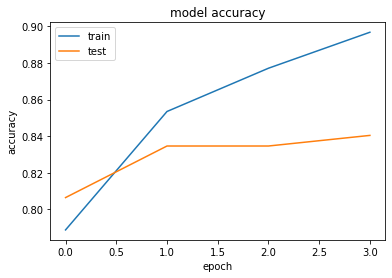

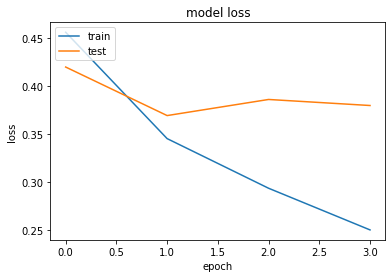

In [68]:
import keras
size_voc = 5000
model2 = Sequential()
embedding_vector_features = 140
model2.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))
model2.add(LSTM(100, dropout = 0.2, return_sequences = True))
model2.add(LSTM(100,dropout= 0.2))
model2.add(Dense(1,activation='sigmoid'))
optimizer1 = keras.optimizers.Adam(lr=0.005)
model2.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=['accuracy'])
print(model2.summary())


history = model2.fit(X_train,y_train,epochs=4,validation_data=(X_test,y_test),batch_size=80)


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
################### test data prediction #####################################
y_pred=model2.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print("confusion-matrix:\n" ,confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion-matrix:
 [[4124  837]
 [ 759 4280]]
accuracy_score: 0.8404


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 70, 140)           700000    
_________________________________________________________________
module_wrapper_76 (ModuleWra (None, 70, 100)           96400     
_________________________________________________________________
module_wrapper_77 (ModuleWra (None, 100)               80400     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 876,901
Trainable params: 876,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
1000/1000 [==============================] - 24s 21ms/step - loss: 0.4297 - accuracy: 0.7923 - val_loss: 0.3559 - val_accuracy: 0.8428
Epoch 2/2
1000/1000 [==============================] - 20s 20ms/step - loss: 0.3390 - accuracy:

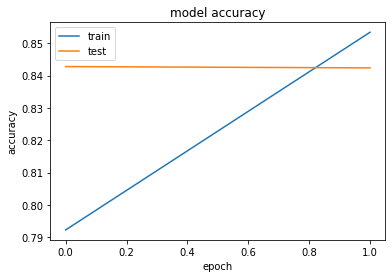

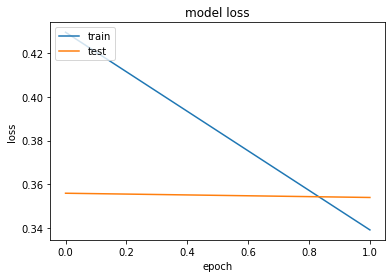

In [88]:
import keras
size_voc = 5000
model2 = Sequential()
embedding_vector_features = 140
model2.add(Embedding(size_voc,embedding_vector_features,input_length=sent_length))
model2.add(LSTM(100, dropout = 0.5, return_sequences = True))
model2.add(LSTM(100,dropout= 0.5))
model2.add(Dense(1,activation='sigmoid'))
optimizer1 = keras.optimizers.Adam(lr=0.0003)
model2.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=['accuracy'])
print(model2.summary())


history = model2.fit(X_train,y_train,epochs=2,validation_data=(X_test,y_test),batch_size=40)


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()